In [43]:
# دیابت فچ کردن دیتاست
from sklearn.datasets import fetch_openml

dataset = fetch_openml(data_id =37 , as_frame = True)

df = dataset.frame
df.head(5)

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   preg    768 non-null    int64   
 1   plas    768 non-null    int64   
 2   pres    768 non-null    int64   
 3   skin    768 non-null    int64   
 4   insu    768 non-null    int64   
 5   mass    768 non-null    float64 
 6   pedi    768 non-null    float64 
 7   age     768 non-null    int64   
 8   target  768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


array([[<Axes: title={'center': 'preg'}>,
        <Axes: title={'center': 'plas'}>,
        <Axes: title={'center': 'pres'}>],
       [<Axes: title={'center': 'skin'}>,
        <Axes: title={'center': 'insu'}>,
        <Axes: title={'center': 'mass'}>],
       [<Axes: title={'center': 'pedi'}>,
        <Axes: title={'center': 'age'}>, <Axes: >]], dtype=object)

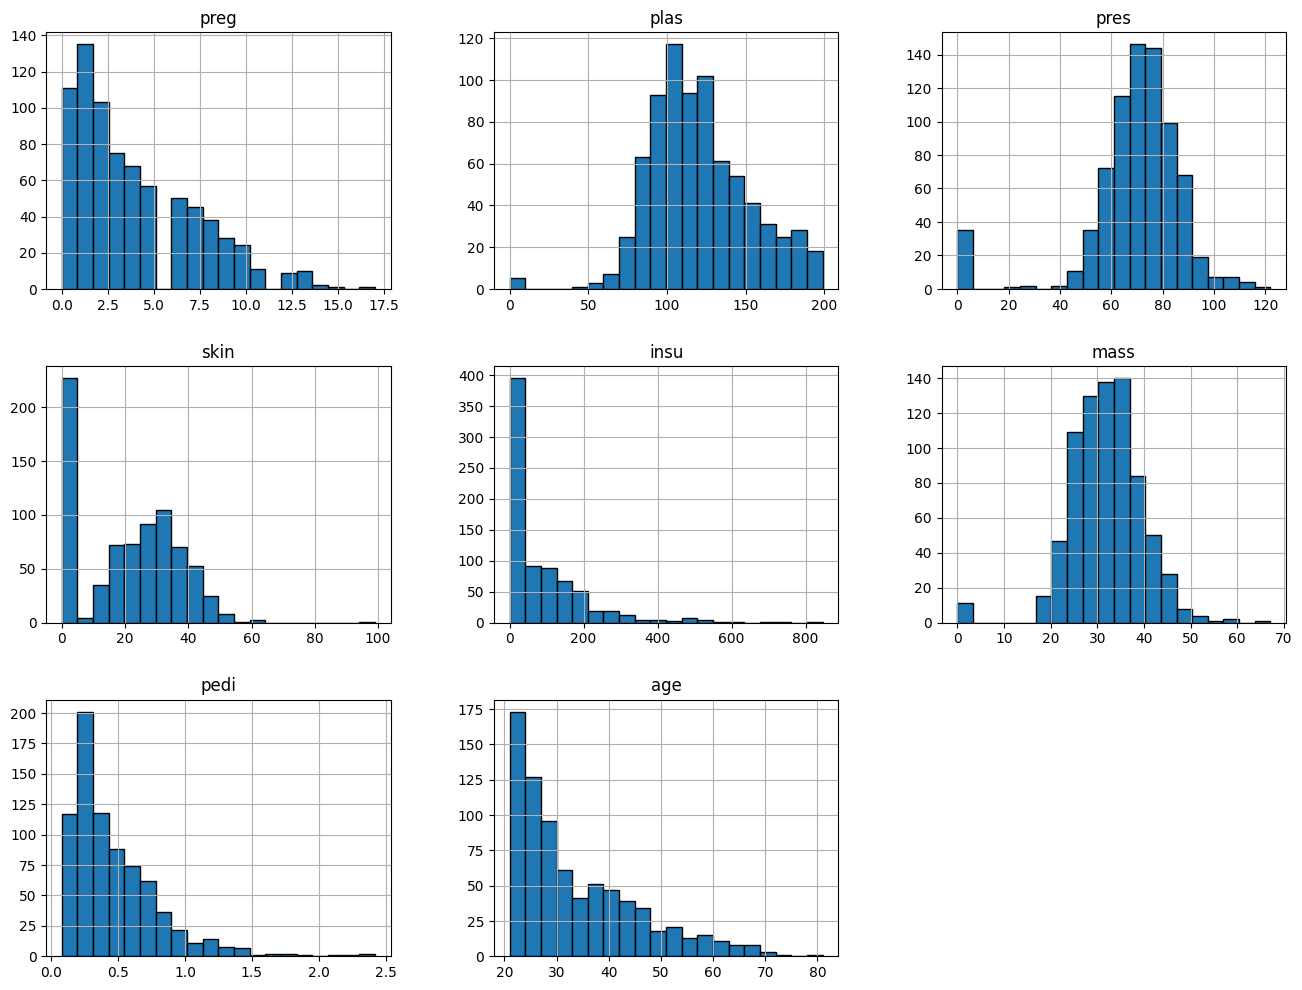

In [11]:
df.info()
df.hist(bins=20, layout=(3, 3), figsize=(16, 12), edgecolor='black')

In [37]:
# عددی کردن ستون تارگت
df['target'] = df['class'].map({'tested_positive' : 0 ,'tested_negative':1 })
df.drop('class', axis = 1 , inplace = True)
df.head(5)

,preg,plas,pres,skin,insu,mass,pedi,age,target
0,6,148,72,35,0,33.6,0.627,50,0
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,0
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,0


In [12]:
# به علت اینکه صفر های موجود در بعضی ستون ها نامعتبر هستن باید اونهارو حذف کنیم
import numpy as np

cols_with_missing_zeros = ['plas', 'pres', 'skin', 'insu', 'mass']
df[cols_with_missing_zeros] = df[cols_with_missing_zeros].replace(0, np.nan)

In [17]:
x = df.drop(columns= 'target')
y = df['target']

from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(x , y, random_state=42 , stratify = y)

In [19]:
# ساخت پایپ لاین
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler()),
    ('model',LogisticRegression(max_iter=1000 , random_state=42))
])

array([[<Axes: title={'center': 'preg'}>,
        <Axes: title={'center': 'plas'}>,
        <Axes: title={'center': 'pres'}>],
       [<Axes: title={'center': 'skin'}>,
        <Axes: title={'center': 'insu'}>,
        <Axes: title={'center': 'mass'}>],
       [<Axes: title={'center': 'pedi'}>,
        <Axes: title={'center': 'age'}>, <Axes: >]], dtype=object)

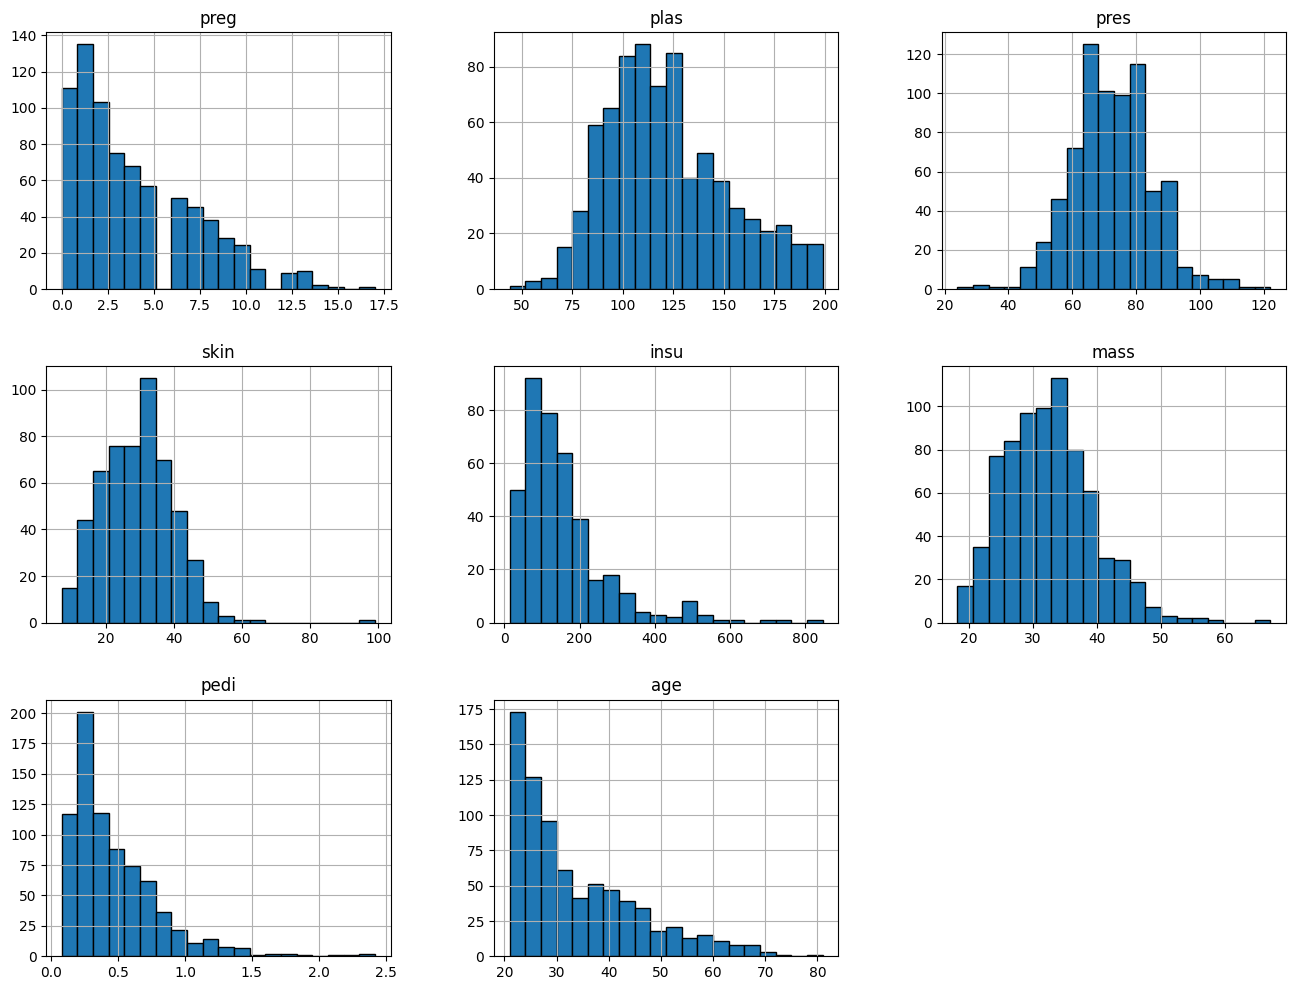

In [26]:
df.hist(bins=20, layout=(3, 3), figsize=(16, 12), edgecolor='black')

In [20]:
pipe.fit(x_train , y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=1000, random_state=42))])

In [21]:
y_pred= pipe.predict(x_test)

In [24]:
# ارزیابی مدل
from sklearn.metrics import classification_report, confusion_matrix

CM=confusion_matrix(y_test, y_pred)
CR=classification_report(y_test, y_pred)
CM , CR

(array([[ 33,  34],
        [ 13, 112]]),
 '              precision    recall  f1-score   support\n\n           0       0.72      0.49      0.58        67\n           1       0.77      0.90      0.83       125\n\n    accuracy                           0.76       192\n   macro avg       0.74      0.69      0.71       192\nweighted avg       0.75      0.76      0.74       192\n')

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__C':[0.01 , 0.1 , 1 , 10 , 100],
    'model__penalty':['l1','l2'],
    'model__solver': ['liblinear', 'saga']
}

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv = 5,
    scoring = 'f1',
    n_jobs= -1
)

In [29]:
grid.fit(x_train , y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **la

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='median')),
                                       ('scaler', StandardScaler()),
                                       ('model',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'model__C': [0.01, 0.1, 1, 10, 100],
                         'model__penalty': ['l1', 'l2']},
             scoring='f1')

In [31]:
print("Best params:", grid.best_params_)
print("Best score:", grid.best_score_)

Best params: {'model__C': 100, 'model__penalty': 'l2'}
Best score: 0.8354261624701877


In [33]:
y_pred = grid.predict(x_test)

In [35]:
cr = classification_report(y_test, y_pred, digits=4)
cm = confusion_matrix(y_test, y_pred)
cm , cr

(array([[ 34,  33],
        [ 13, 112]]),
 '              precision    recall  f1-score   support\n\n           0     0.7234    0.5075    0.5965        67\n           1     0.7724    0.8960    0.8296       125\n\n    accuracy                         0.7604       192\n   macro avg     0.7479    0.7017    0.7131       192\nweighted avg     0.7553    0.7604    0.7483       192\n')

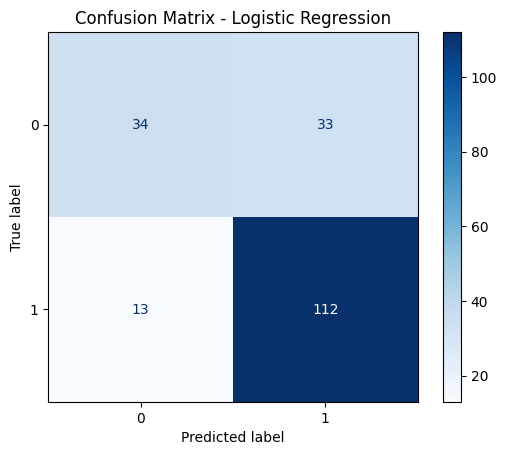

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.grid(False)

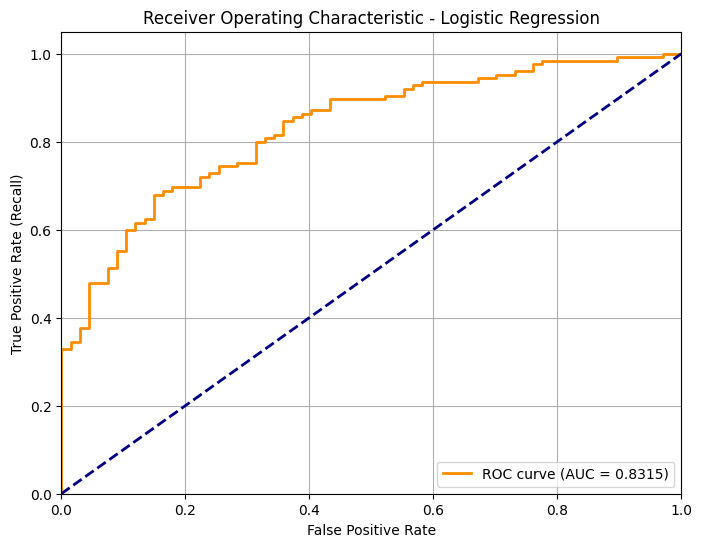

In [42]:
from sklearn.metrics import roc_curve, auc

y_scores = grid.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)